此文档将集中讲述机器学习中几种常用的数据预处理的方法，原始数据的预处理工作也叫做特征工程。在将收集来的数据用于训练机器学习模型之前，一些预处理工作是很有必要的。数据集中的有用信息量是否充足以及数据集中的样本数量是否达到要求，都将对模型的性能产生直接的影响。

##### 一、本小节的程序将演示处理数据中的缺失值的几种常用方法。

In [1]:
import pandas as pd
from io import StringIO
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


注：CSV文件是以逗号作为间隔符的数值文件

In [2]:
df.isnull().sum(axis=0) # axis参数可以指定求和的维度

A    0
B    0
C    1
D    1
dtype: int64

In [3]:
df.values # 取df的values属性，返回一个ndarray数组

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

###### 1.将存在缺失值的特征或样本删除

处理缺失数据最简单的方法是：将包含有缺失数据的特征(列)删除或者样本(行)删除。可以利用dropna()方法来完成这些处理。

In [4]:
df.dropna(axis=0) # 取行

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [5]:
df.dropna(axis=1) # 取列

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


###### 2.对缺失值进行填充

删除样本或者删除数据集中的整个特征列是不可行的，因为有可能会丢失过多有价值的数据。在此情况下，可以使用不同的差值技术，通过数据集中其他训练样本的数据来估计缺失值。最常用的插值技术有均值插补(mean inputation)

In [6]:
from sklearn.preprocessing import Imputer

imr=Imputer(missing_values='NaN',strategy='mean',axis=0)
imr=imr.fit(df)
imputed_data=imr.transform(df.values)
imputed_data

c:\users\hsz\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

注：strategy参数的可选项还有median(中位数)和most_frequent(众数)，其中众数常用来填充类别特征值。

##### 二、以下小节的内容将介绍如何给数据特征(列)进行编码

在讨论标签数据时又可以进一步划分为标称特征和有序特征。有序特征可以简单理解为能够通过一个确定的关系来排序的特征，如T恤衫的尺寸可以排序为：XL>L>M。而标称特征不具有某个尺度上的大小关系，如T恤衫的颜色。

以下小段代码将展示如何创建DataFram这种二维表的数据类型

In [7]:
# 直接创建
import pandas as pd 
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel'] # 设置DataFram的列标
df.index = ['0', '1', '2']    # 设置DaraFram的行标

# 通过字典创建
dict = {'name':['小明', '小红', '狗蛋', '铁柱'],
        'age':[17, 20, 5, 40], 
        'gender':['男', '女', '男', '男']}
df1 = pd.DataFrame(dict, index=['a', 'b', 'c', 'd'])
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [8]:
# 定义一个映射关系，将size转换成数值

size_mapping = {'XL':3, 'L':2, 'M':1}
df['size'] = df['size'].map(size_mapping)
df
# 以下代码将数值还原为字符串
# inv_size_mapping={v:k for k,v in size_mapping.items()}
# df['size'] = df['size'].map(inv_size_mapping)
# print(df)

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


###### 对标签进行整数编码

In [9]:
import numpy as np
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}
print(class_mapping)
df['classlabel'] = df['classlabel'].map(class_mapping)
df

{'class1': 0, 'class2': 1}


,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


###### 以下代码利用LabelEncoder类对标签进行整数编码

In [122]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder() # 创建标签编码类的对象
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [123]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

###### 以下代码对无序的标称特征(颜色)进行独热编码(one-hot encoding)

In [22]:
from sklearn.preprocessing import LabelEncoder

X = df[['color', 'size', 'price']].values # 取DataFram的值,得到ndarray数组
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
print(X)

from sklearn.preprocessing import OneHotEncoder

'''
初始化OneHotEncoder对象时如果不指定sparse=False，调用fit_transform()方法后会产生稀疏矩阵，此时为了可视化需要再调用一个
toarray()方法转换为一般的ndarray数组。如果事先指定了sparse=False，调用fit_transform()方法就会直接产生ndarray数组。
'''
ohe = OneHotEncoder(categorical_features=[0], sparse=False) # categorical_features参数指定需要转换的特征的位置(所在列)
ohe.fit_transform(X) 

[[1 1 10.1]
 [2 2 13.5]
 [0 3 15.3]]


c:\users\hsz\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\hsz\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

##### 三、本小节内容将介绍如何将数据集划分了训练集、验证集和测试集

本小节将使用葡萄酒数据集来演示相关工作

In [4]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
print(type(df_wine))
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                  'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
                  'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
print('Class labels', np.unique(df_wine['Class label']))
df_wine.head(5) # 从尾部开始打印DataFrame的数据，默认打印5个。调用head()函数可以查看头部数据

<class 'pandas.core.frame.DataFrame'>
Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


###### 利用scikit-learn的model_selection子模块

In [5]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values # df_wine.iloc[:, 1:]后还是DataFrame，取values值后变成ndarray数组

X_train, X_test, y_train, y_test = \
              train_test_split(X, y, test_size=0.3, random_state=0)

注：一般不会给测试数据集分配太多的数据，但要保证测试数据集能够在某种程度上检验出模型的泛化能力。基于原始数据集的大小，划分的比例也有所不同。对于小数据集，划分的比例通常为7:3、8:2。而对于大数据集，在满足上述条件的前提下，9:1、99:1都是可以接受的。

##### 四、本小节将描述特征缩放的操作流程

特征缩放是数据预处理中至关重要的一步，对于大多数机器学习算法，将特征的值缩放到相同的区间可以使其性能更佳。目前将不同的特征缩放到相同的区间有两个常用的方法：归一化和标准化。

###### 1.归一化：将特征缩放到一个有界的区间，如[0, 1]

In [6]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train) # fit()方法会计算需要用到的数值，即最小值和最大值，transform()方法将执行缩放操作
                                          # 此处的fit_transform()代表先计算后缩放
X_test_norm = mms.transform(X_test)       # 根据归一化的原则，对测试集的数据进行归一化时需要用训练集的最小值和最大值，故此处只需直接调用transform()

###### 2.标准化：将特征转化为均值为0，方差为1的标准正态分布

In [7]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

##### 五、本小节将简要介绍如何减少模型的过拟合

过拟合：模型参数对于训练数据集拟合得很接近，如果训练数据集中的信息不能代表或者说不能完全代表真实数据的分布，就会导致模型在测试集上表现很差。产生过拟合的原因是建立在给定训练集上的模型过于复杂，常用的降低泛化误差的方案有：  
1)收集更多的训练数据；  
2)通过正则化引入惩罚项；  
3)选择一个参数相对较少的简单模型；  
4)降低数据的维度。

###### 1.以下代码将添加了L1正则化项的Logistic回归模型用来训练经过标准化处理的葡萄酒数据集

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


# 导入数据
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                  'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
                  'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

# 将数据划分为训练集和验证集
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
              train_test_split(X, y, test_size=0.3, random_state=0)

# 标准化处理
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# 创建模型

lr = LogisticRegression(penalty='l1', C=0.1, random_state=0, solver= 'liblinear', multi_class='ovr') # 参数penalty控制正则化项
                                                                                                     # ovr(One-vs-Rest)
lr.fit(X_train_std, y_train)
print('Trainning accuracy:', lr.score(X_train_std, y_train))


Trainning accuracy: 0.9838709677419355


In [19]:
lr.intercept_

array([-0.3837824 , -0.15807499, -0.70034464])

In [20]:
lr.coef_

array([[ 0.28003518,  0.        ,  0.        , -0.02799855,  0.        ,
         0.        ,  0.70999431,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23663374],
       [-0.64397268, -0.06873959, -0.05722193,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.9267038 ,
         0.06021201,  0.        , -0.37106374],
       [ 0.        ,  0.06141298,  0.        ,  0.        ,  0.        ,
         0.        , -0.63688511,  0.        ,  0.        ,  0.4984783 ,
        -0.35818783, -0.57028071,  0.        ]])

注：通过lr.coef_属性得到的权重数组包含有三个权重系数向量，每一个向量对应于一个分类。每一个向量包含13个权重值，通过与13维的葡萄酒数据集中的特征数据相乘来计算模型的净输入：
$$
z=w_{1} x_{1}+\cdots+w_{m} x_{m}=\sum_{j=0}^{m} x_{j} w_{j}=\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}
$$

从权重数组中可以看出，训练出来的模型是稀疏的，只有少数几个非零项。接下来绘制一下正则化效果的图，它展示了将权重系数（正则化参数）应用于多个特征上时所产生的不同的正则化效果：

(10, 13)


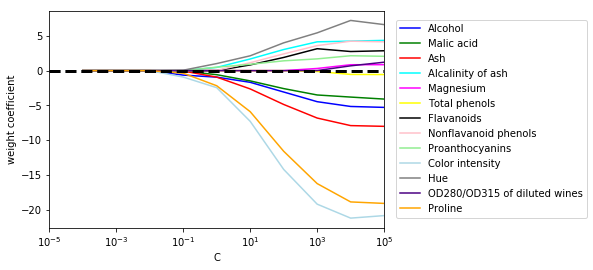

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure() # 
# ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink',
         'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

weights, params =[], []
for c in np.arange(-4, 6, dtype=float):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0, solver= 'liblinear', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)
print(weights.shape)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3) # 画出y=0的线
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
# plt.legend(loc='upper right')
plt.legend(loc='upper center', bbox_to_anchor=(1.32, 0.98), ncol=1, fancybox=True) 
plt.show()

###### 2.通过特征选择进行降维从而达到减少过拟合的目的

该方法对未经正则化处理的模型特别有效。降维技术主要分为两个大类：特征选择和特征提取。通过特征选择，我们可以选出原始特征的一个子集。而在特征提取中，通过对现有的特征信息进行推演，构造出一个新的特征子空间。

SBS算法是特征选择算法的一个典型代表，其算法思想是在使得分类性能衰减最小的约束下，降低原始特征空间的维度(删除某些特征列)以提高计算效率。以下代码用python实现SBS算法。

In [22]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features # 指定需返回的特征数量
        self.test_size = test_size   # 训练集和验证集的划分比例
        self.random_state = random_state
        
    def fit(self, X, y):
        # 将外部已经划分好的训练集进一步划分为训练集和验证集
        X_train, X_test, y_train, y_test=\
                train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1): # combination()方法实现的是排列组合，对每一种可以的组合进行遍历
                score = self._calc_score(X_train, y_train, X_test, y_test, p) # 得到模型的评估分数
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores) # best是最大分数值的下标
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1 # 每次迭代后特征维度减1     
            self.scores_.append(scores[best]) # 将分数保存，方便输出
        self.k_score_ = self.scores_[-1]
        return self
    
    # 提取出相关的特征列                          
    def transform(self, X):
        return X[:, self.indices_] 
    
    # 计算模型的评估分数
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])       
        score = self.scoring(y_test, y_pred)     
        return score

In [50]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

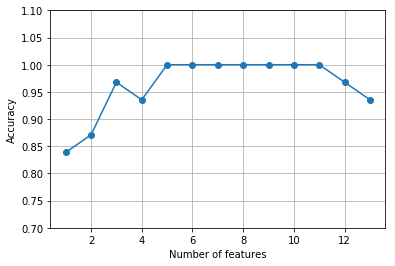

In [51]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1]) # 定义纵轴的显示范围
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid() # 显示网格
plt.show()

In [53]:
# 打印出SBS算法进行特征选择后的五个特征的列标
k5 = list(sbs.subsets_[8])
print(k5)
print(df_wine.columns[1:][k5]) # 从第二列开始打印出特征的列标

[0, 1, 3, 10, 12]
Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


以下代码将比较全部特征与SBS算法选定的五个特征分别运用于KNN的性能：

In [54]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.9838709677419355
Test accuracy: 0.9444444444444444


In [56]:
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Training accuracy: 0.9596774193548387
Test accuracy: 0.9629629629629629


注：比较以上数据可以看出，经过SBS算法对特征进行选择后，虽然在训练数据集上，分类性能有所降低，但在测试集上却得到了增强，并且从训练集和测试集的分类评分上看，过拟合现象得到了缓解。

###### 3.通过随机森林判定特征的重要性

可以通过森林中的所有的决策树得到平均不纯度衰减来度量特征的重要性，而不必考虑数据是否线性可分。

In [63]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=10000,random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
print(importances)
indices = np.argsort(importances)[::-1] # 按从大到小进行排序，返回数组的下标
print(indices)
for f in range(X_train.shape[1]):
    
    print('%2d) %-*s %f'%(f+1, 50, feat_labels[indices[f]], importances[indices[f]]))

[0.10658906 0.02539968 0.01391619 0.03203319 0.02207807 0.0607176
 0.15094795 0.01464516 0.02235112 0.18248262 0.07824279 0.1319868
 0.15860977]
[ 9 12  6 11  0 10  5  3  1  8  4  7  2]
 1) Color intensity                                    0.182483
 2) Proline                                            0.158610
 3) Flavanoids                                         0.150948
 4) OD280/OD315 of diluted wines                       0.131987
 5) Alcohol                                            0.106589
 6) Hue                                                0.078243
 7) Total phenols                                      0.060718
 8) Alcalinity of ash                                  0.032033
 9) Malic acid                                         0.025400
10) Proanthocyanins                                    0.022351
11) Magnesium                                          0.022078
12) Nonflavanoid phenols                               0.014645
13) Ash                                       

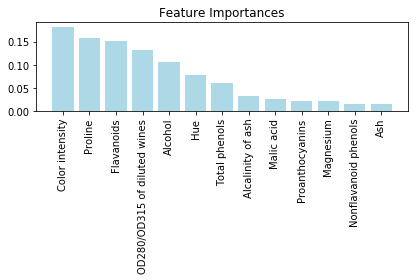

In [69]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

总结：本篇笔记分别讲述了以下几点预处理技术：1)如何处理缺失数据；2)如何对标签进行编码；3)如何将特征映射为整数；4)对数据进行归一化和标准化；5)通过L1正则化产生稀疏模型，从而减少过拟合；6)通过序列特征选择算法(SBS)从数据集中选择最能表现数据分布的特征。这些技术在预处理工作中被广泛应用，对模型的优化具有十分良好的效果。